# Introduction to the exploration of epidemiological models using EMULSION



| Author: **Sébastien Picault, INRAE** | June 2-4, 2021 |
|---|---|
| License: [CC-BY-NC-SA](https://en.wikipedia.org/wiki/Creative_Commons_license) | ![CC-BY-NC-SA](https://upload.wikimedia.org/wikipedia/commons/1/12/Cc-by-nc-sa_icon.svg "License CC-BY-NC-SA") |






## Exercise 1 — Your first EMULSION model

File [`exercises/step1.yaml`](exercises/step1.yaml) describes EMULSION components of a discrete-time, stochastic, compartment-based SIR model.

### 1.1 Dive into the model

Open the file in a text editor and look at the different parts. Identify where states and transitions, initial conditions, and parameters are defined.

### 1.2 Run the model

Run the model with EMULSION and look at simulation outcomes. To do so, open a terminal in the `exercises` directory and type what follows:
    
```
emulsion run --plot step1.yaml
```


In [1]:
%%bash 
cd exercises
emulsion run --plot step1.yaml

Simulation level:herd
Simulation finished in 2.28 s
Outputs stored in outputs/counts.csv
Outputs plot in file: img/stoch_compart_SIR.html


[Run 0]: 100%|██████████| 100/100
[Run 1]: 100%|██████████| 100/100
[Run 2]: 100%|██████████| 100/100
[Run 3]: 100%|██████████| 100/100
[Run 4]: 100%|██████████| 100/100
[Run 5]: 100%|██████████| 100/100
[Run 6]: 100%|██████████| 100/100
[Run 7]: 100%|██████████| 100/100
[Run 8]: 100%|██████████| 100/100
[Run 9]: 100%|██████████| 100/100


Plots corresponding to simulation outcomes are produced in a file named after the `model_name` value specified in the YAML file: [img/stoch_compart_SIR.html](exercises/img/stoch_compart_SIR.html). 

They are built from the simulation outputs which are stored in a CSV file named `counts.csv`, which by default is located in the `outputs/` directory: [outputs/counts.csv](exercises/outputs/counts.csv)

**NOTE:** Running `emulsion -h` provides all possible commands and options (see main ones in file [`appendix.pdf`](appendix.pdf)). Also, in the terminal, the command comes with completion (start typing and hit TAB key to view proposals).

In [32]:
%%bash
emulsion -h

Usage:
    emulsion run [--plot] MODEL [options] [(-p KEY=VALUE)...]
    emulsion show MODEL [options] [(-p KEY=VALUE)...]
    emulsion describe MODEL PARAM...
    emulsion diagrams MODEL [options]
    emulsion plot MODEL [options]
    emulsion check MODEL [options]
    emulsion generate MODEL
    emulsion (-h | --help | -V | --version | -L | --license)

Commands:
  run MODEL                   Run simulations based on the specified MODEL
                              (MODEL is the path to the YAML file describing the
                              model to run).
  show MODEL                  Print all MODEL parameter values and exit.
  describe MODEL PARAM...     Describe the role of specified PARAMeters in the
                              MODEL and exit.
  diagrams MODEL              Produce model diagrams (as option --view-model
                              when running/plotting) and open them
  plot MODEL                  Plot outputs for MODEL (assumed already run) and
           

### 1.3 View model diagrams 

Produce a graphical representation of the state machines of the model:

```
emulsion diagrams step1.yaml
```

then look at the results here: [img/stoch_compart_SIR_health_state_machine.svg](exercises/img/stoch_compart_SIR_health_state_machine.svg).    

![stoch_compart_SIR_health_state_machine.svg](exercises/img/stoch_compart_SIR_health_state_machine.svg)

In [36]:
%%bash
cd exercises
emulsion diagrams step1.yaml

Simulation level:herd
Generated state machine diagram img/stoch_compart_SIR_health_state_machine.svg


 * These diagrams are produced automatically from the model using Graphviz and the "dot" format. The corresponding figures are in the `img/` directory, named after the model and each state machine, for instance [stoch_compart_SIR_health_state_machine.svg](exercises/img/stoch_compart_SIR_health_state_machine.svg). By default, they are produced in SVG format; alternatively (with option `--format`), they can be produced in PDF or PNG formats.
    
 * The "dot" files are in `outputs/` and can be customized for further use: [stoch_compart_SIR_health_state.dot](exercises/outputs/stoch_compart_SIR_health_state.dot)
    

### 1.4 Parenthesis: Integrate simulation results with R

The default plots produced by EMULSION are not meant to be used but for immediate feedback during model prototyping. Otherwise, the simulation results can be processed with your favourite statistics tool. In what follows, we will provide examples based on [R](https://www.r-project.org/) with libraires [tidyverse](https://www.tidyverse.org/).

In [34]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


`summarise()` has grouped output by 'step'. You can override using the `.groups` argument.


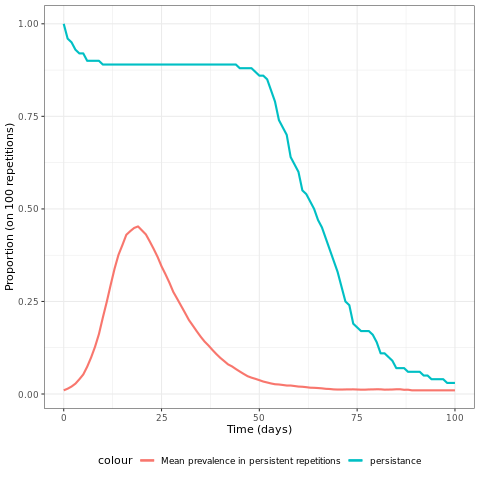

In [37]:
%%R
library(tidyverse)
results <- read.table("~/exercises/outputs/counts.csv", sep=",", header=TRUE)
## names(results)
## [1] "simu_id"               "S"                     "I"                    
## [4] "R"                     "J"                     "A"                    
## [7] "step"                  "level"                 "agent_id"             
##[10] "percentage_prevalence" "total_herd"           

## compute a persistence curve
NB.RUNS = max(results$simu_id) + 1 
results %>% 
    select(simu_id, step, I, total_herd) %>% 
    mutate(persists=(I > 0)) %>% 
    group_by(step) %>% 
    summarise(persistance=sum(persists)/NB.RUNS, prevalence=sum(I)/(total_herd * sum(persists))) %>%
    ggplot() + 
        geom_line(aes(x=step, y=persistance, colour="persistance"), size=1) + 
        geom_line(aes(x=step, y=prevalence, colour="Mean prevalence in persistent repetitions"), size=1) +
        theme_bw() + xlab("Time (days)") + ylab(paste("Proportion (on", NB.RUNS, "repetitions)")) + theme(legend.position = "bottom")

### 1.5 Change simulation conditions

Play with the model through the command-line interface: for instance, to run only one repetition (`-r 1`) but observe the evolution of the system in the long run (500 days: `-t 500`) with different parameter values (`-p` to change parameter value):

```
emulsion run --plot step1.yaml -r 1 -t 500 -p transmission_I=0.2 -p initial_prevalence=0.1
 ```
 

In [41]:
%%bash
cd exercises
emulsion run --plot step1.yaml -r 1 -t 500 -p transmission_I=0.2 -p initial_prevalence=0.1

/Users/picault/git/my-first-binder/exercises
Simulation level:herd
Simulation finished in 0.95 s
Outputs stored in outputs/counts.csv
Outputs plot in file: img/stoch_compart_SIR.html


[Run 0]: 100%|██████████| 500/500


## Exercise 2 — Introduce demography and age structure

Open file [`step2.yaml`](exercises/step2.yaml) and incorporate the following changes:

### 2.1 Add age groups

We will represent two age groups: **juveniles** (J) and **adults** (A), juveniles becoming adults at rate *maturation=0.05*. We will take example on existing parameters, processes and state machines:

- rename the model from `stoch_compart_SIR` to `stoch_compart_SIR_JA`
- add a process at animals level, named `age_group`
  
      processes:
        animals:
          - health_state
          - age_group   
      
- add a state machine `age_group`, with two states (J and A), and a transition between J and A 

      state_machines:
         ...
         age_group:
         desc: '...'
         states:
           - J:
               name: 'Juveniles'
               desc: '...'
               fillcolor: 'purple'
           - A:
               name: 'Adults'
               desc: 'a...'
               fillcolor: 'darkred'
         transitions:
           - from: J
             to: A
             rate: 'maturation'
             desc: 'maturation of juvenile individuals into adults'

- add the parameter `maturation`
  
      parameters:
        ...
        maturation: 
          desc: 'maturation rate, i.e. speed at which juveniles become adults'
          value: 0.05      
  

### 2.2 Run the model and observe the results. 
    
```
emulsion run --plot step2.yaml --silent
```

**NOTE:** Initial individuals are distributed randomly in J and A states. To automatically affect the whole population to state J, add to the description of state J (with name, desc, etc.):

               - J:
                   name: 'Juveniles'
                   desc: '...'
                   fillcolor: 'purple'
                   default: yes

In [30]:
%%bash
cd exercises 
python -m emulsion run --plot step2.yaml --silent -r 100

Simulation level:herd
Simulation finished in 29.38 s
Outputs stored in outputs/counts.csv
Outputs plot in file: img/stoch_compart_SIR.html


100%|██████████| 100/100


### 2.3 Add a density-dependent mortality

Mortality is represented with a new state "Deceased" (D) in state machine `age_group`. It produces a "sink" to put individuals leaving the system.

Add state D **with property `autoremove: yes`** and transitions from both J and A to D with mortality rate `mu * total_herd / K`. 
- variable `total_herd` represents the total number of animals, automatically defined in EMULSION
- add two new parameters: the base mortality rate *mu = 0.05* and the carrying capacity of the environment *K = 150*


### 2.4 Add a birth dynamics

State machines can define a `productions:` section (similar to `transitions:`) to specify from and to which states and at which rate new individuals are produced.

- create a new prototype `newborn` for new individuals, specifying their `age_group` (J) but also their `health_state` (S, assuming no vertical transmission)
- add a production link between A and J (adults produce juveniles) at birth rate *b = mu* $\times\ 2$, specifying `prototype: newborn` for the newly created individuals

### 2.5 Check the new diagram

You can visualize the diagram corresponding to the new state machine:

```
emulsion diagrams step2.yaml
```

![img/stoch_compart_SIR_JA_age_group_machine.svg](exercises/img/stoch_compart_SIR_JA_age_group_machine.svg)

**PLEASE NOTE:**
- the *autoremove* state (D) with dotted box
- the *production link* from A to J, with dashed arrow

In [ ]:
%%bash
cd exercises
emulsion diagrams step2.yaml